In [113]:
import pandas as pd
import numpy as np
import os
import string

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from matplotlib.lines import Line2D


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")



In [114]:
emissions = pd.read_excel('../../data/tidy/Emissions-Reduction-Calculation.xlsx')
activity = pd.read_csv('../../results/sectors/NewHaven-Emissions-Summary.csv')
activity

,Year,Sector,Subsector,Activity Data Description,Activity Data Unit,Activity Data,GHG Emissions (MMTCO2e),Population,Emissions per Capita (MTCO2e)
0,2021,Mobile Combustion,Automobile,Vehicle Miles Traveled,Billion Miles,2.806589,1.028899,864751,1.189821
1,2021,Mobile Combustion,Motorcycle,Vehicle Miles Traveled,Billion Miles,0.208674,0.036643,864751,0.042374
2,2021,Mobile Combustion,Trucks,Vehicle Miles Traveled,Billion Miles,3.870990,1.789613,864751,2.069512
3,2021,Mobile Combustion,Buses,Vehicle Miles Traveled,Billion Miles,0.025632,0.020234,864751,0.023399
4,2021,Electricity Consumption,Residential,Electricity Consumption,TWh,2.481066,0.612048,864751,0.707773
5,2021,Electricity Consumption,Commercial/Industrial,Electricity Consumption,TWh,2.849325,0.702893,864751,0.812827
6,2021,Solid Waste,Waste Combustion,Waste Combustion Emissions,,NaN,0.000000,864751,0.000000
7,2021,Solid Waste,Landfill Emissions,Landfills Emissions,,NaN,0.000000,864751,0.000000
8,2020,Stationary Combustion,Residential,Household Heating Oil Consumption,Million Gallon,74.623292,0.759970,855733,0.888093
9,2020,Stationary Combustion,Residential,Household Propane Consumption,Million Gallon,9.975587,0.057276,855733,0.066932


In [115]:
# Remove rows starting from index 20
emissions = emissions.iloc[:20]

# Keep only the first four columns
emissions = emissions.iloc[:17, :4]
emissions

,Sector,Subsector,Year,Total Emissions (MMTCO2e)
0,Mobile Combustion,Automobile,2021.0,1.028899
1,Mobile Combustion,Motorcycle,2021.0,0.036643
2,Mobile Combustion,Trucks,2021.0,1.789613
3,Mobile Combustion,Buses,2021.0,0.020234
4,Electricity Consumption,Residential Electricity,2021.0,0.612048
5,Electricity Consumption,Commercial&Industrial Electricity,2021.0,0.702893
6,Solid Waste Landfills,Landfill fuel combustion,2021.0,0.000000
7,Solid Waste Landfills,Landfill methane,2021.0,0.000000
8,Stationary Combustion,Residential fuel oil,2020.0,0.760000
9,Stationary Combustion,Residential natural gas,2020.0,0.540000


In [116]:
sum_emissions = emissions["Total Emissions (MMTCO2e)"].sum()

In [117]:
sum_emissions

6.9718299340000005

In [118]:
# EFmobile = [8.78, 10.21,0.008,0.007, 0,0,0.005,0.005,0.001,0.001] 
# EFe = [543.852]
# EFr = [10422.49,5741.65,54.44]
# R = [24.1, 22.1, 12.96, 50]

# EFcar = (8.78/24.1/1000+0.008*25/1000000+0.007*298/1000000)*1000000000
# EFmotor = 8.78/50/1000*1000000000
# EFtruck = (10.21/22.1/1000+0.001*25/1000000+0.001*298/1000000)*1000000000
# EFbus = (10.21/12.96/1000 + 0.005*25/1000000+0.005*298/1000000)*1000000000
# EFe = 543.852/2204.62
# Qrs = 1
# EFroil = 
# EFrgas = 
# EFrpropane = 


# EFGG = [EFcar,EFmotor,EFtruck,EFbus,EFe,Qrs,EFr,Qrc,Qri,Qra,Qrw]
#R represents a constant and it means mpg here: passenger_car gasoline, light truck diesel, heavy duty diesel, motorcycle gasoline
#gasoline, diesel, CH4 and N20 for gaso_passenger, gaso_motorcycle, bus, truck individually
Et = emissions['Total Emissions (MMTCO2e)'].tolist()
Qa = activity['Activity Data'].tolist()

In [119]:
Et

[1.028899302,
 0.036643172,
 1.789612608,
 0.020234238,
 0.612047787,
 0.702892598,
 0.0,
 0.0,
 0.76,
 0.54,
 0.06,
 0.96,
 0.339402,
 9.88e-05,
 0.029055486,
 8.68e-05,
 0.092857143]

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import qmc

# Example dataframe representing baseline values and upper/lower bounds
# data = {
#     'Label': ['u_1', 'u_2', 'u_3', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9', 'u_10', 'u_11', 'u_12', 'u_13', 'u_14', 'u_15', 'u_16', 'u_17', 'u_18', 'u_19', 'u_20'],
#     'Parameter': ['Passenger car VMT', 'Motorcycle VMT', 'Trucks VMT', 'Bus VMT', 'Passenger car MPG', 'Motorcycle MPG', 'Trucks MPG', 'Bus MPG', 
#                   'Regional e-Grid emissions factors', 'Residential electricity consumption', 'Commercial and industrial electricity consumption', 
#                   'Residential fuel oil consumption', 'Residential propane consumption', 'Residential natural gas consumption', 'Commercial building footprint ratio', 
#                   'Industrial emissions', 'Organic fertilizer land area', 'Synthetic fertilizer land area', 'Manure fertilizer land area', 'Regional to state wastewater facility ratio'],
#     'Baseline Activity Value': [2.81, 0.21, 3.87, 0.03, 24.1, 50, 22.1, 12.96, 543.85, 2.48, 2.85, 74.62, 9.98, 9988.5, 0.25, 0.34, 173, 3764, 1125, 0.24],
#     'Lower Bound': [2.70, 0.1, 3.5, 0.02, 22, 48, 21, 12, 510, 2.3, 2.7, 72, 9, 9900, 0.2, 0.3, 170, 3700, 1100, 0.2],
#     'Upper Bound': [2.95, 0.3, 4.2, 0.05, 26, 52, 23, 13.5, 580, 2.7, 3.0, 77, 10, 10000, 0.3, 0.4, 180, 3800, 1150, 0.3]
# }

data = {
    'Label': ['u_1', 'u_2', 'u_3', 'u_4', 'u_5', 'u_6', 'u_7', 'u_8', 'u_9'],
    'Parameter': ['Car VMT', 'Truck VMT', 'Car MPG', 'E-grid EF', 'Res Elec Con', 'Com/Ind Elec Con', 'Res Fuel Oil', 'Res Propane', 'Res NG'],
    'Baseline Activity Value': [2.81, 3.87, 24.1, 543.85, 2.48, 2.85, 74.62, 9.98, 9988.5],
    'Lower Bound': [2.81 * (1 - 0.5), 3.87 * (1 - 0.5), 24.1 * (1 - 0.5), 543.85 * (1 - 0.5), 2.48 * (1 - 0.80), 
                    2.85 * (1 - 0.80), 74.62 * (1 - 0.5), 9.98 * (1 - 0.5), 9988.5 * (1 - 0.5)],
    'Upper Bound': [2.81 * (1 + 0.5), 3.87 * (1 + 0.5), 24.1 * (1 + 0.5), 543.85 * (1 + 0.5), 2.48 * (1 + 0.5), 
                    2.85 * (1 + 0.5), 74.62 * (1 + 0.5), 9.98 * (1 + 0.5), 9988.5 * (1 + 0.5)]
}



# Create the dataframe
activity_df = pd.DataFrame(data)

# Number of samples you want to generate
num_samples = 1000  # You can adjust this

# Initialize the Latin Hypercube Sampling generator (20 dimensions, one for each parameter)
sampler = qmc.LatinHypercube(d=20, seed=42)  # 20 dimensions (parameters)
lhs_samples = sampler.random(n=num_samples)  # Generate random samples

# Rescale the samples to match the bounds in the activity_df
scaled_samples = np.zeros_like(lhs_samples)
for i, param in enumerate(activity_df['Parameter']):
    low = activity_df.loc[i, 'Lower Bound']
    high = activity_df.loc[i, 'Upper Bound']
    
    # Check if bounds are valid and consistent (no NaN and l_bounds < u_bounds)
    if np.isnan(low) or np.isnan(high) or low >= high:
        print(f"Invalid bounds for parameter '{param}': Lower Bound = {low}, Upper Bound = {high}")
        continue  # Skip this parameter if bounds are invalid
    
    # Reshape lhs_samples[:, i] to a 2D array and then scale it to the parameter bounds
    scaled_samples[:, i] = qmc.scale(lhs_samples[:, i].reshape(-1, 1), l_bounds=[low], u_bounds=[high]).flatten()

# Calculate continuous uncertainty over the samples
uncertainty_ranges_continuous = []
for i, param in enumerate(activity_df['Parameter']):
    baseline = activity_df.loc[i, 'Baseline Activity Value']
    
    # Calculate the uncertainty across all the scaled samples for this parameter
    uncertainty_range = scaled_samples[:, i] 
    
    # Store the uncertainty for visualization or analysis
    uncertainty_ranges_continuous.append({
        'Parameter': param,
        'Uncertainty Distribution': uncertainty_range
    })

# Convert the uncertainty range list to a DataFrame for better presentation
uncertainty_df_continuous = pd.DataFrame(uncertainty_ranges_continuous)


# Optional: Plotting the distribution of the uncertainty for the first parameter
# plt.hist(uncertainty_ranges_continuous[0]['Uncertainty Distribution'], bins=30, alpha=0.7, label=activity_df['Parameter'][0])
# plt.xlabel("Uncertainty Value")
# plt.ylabel("Frequency")
# plt.legend()
# plt.show()
uncertainty_df_continuous
uncertainty_df_continuous.to_excel("uncertainty_summary_statistics.xlsx", index=False)
uncertainty_df_continuous

,Parameter,Uncertainty Distribution
0,Car VMT,"[4.170675183503557, 3.5834297734503604, 2.6373..."
1,Truck VMT,"[2.4402715404381596, 1.9955479845033375, 3.189..."
2,Car MPG,"[26.77850779013014, 23.642806177612087, 15.672..."
3,E-grid EF,"[635.3813863973962, 463.96217607816897, 347.35..."
4,Res Elec Con,"[0.9019203722304101, 1.8765864916054338, 3.685..."
5,Com/Ind Elec Con,"[1.1703003191871857, 2.984938863587409, 2.6084..."
6,Res Fuel Oil,"[41.13344375543748, 58.16877327870189, 56.1599..."
7,Res Propane,"[13.255575078233337, 7.424682838417444, 11.084..."
8,Res NG,"[12514.310836980021, 8898.212379408484, 5197.1..."


In [121]:
EFmco2_gasoline = 8.78 
EFmco2_diesel = 10.21
EFmch4_car = 0.008
EFmn2o_car =0.007
EFmch4_motorcycle = 0
EFmn2o_motorcycle = 0 
EFmch4_buses = 0.005
EFmn2o_buses = 0.005
EFmch4_trucks = 0.001
EFmn2o_trucks = 0.001 
EFer_oil = 10150+ 0.41*25+0.08*298
EFer_propane = 5720+0.27*25+0.05*298
EFer_naturalgas = 54.44


In [122]:
uncertainty_df_continuous

,Parameter,Uncertainty Distribution
0,Car VMT,"[4.170675183503557, 3.5834297734503604, 2.6373..."
1,Truck VMT,"[2.4402715404381596, 1.9955479845033375, 3.189..."
2,Car MPG,"[26.77850779013014, 23.642806177612087, 15.672..."
3,E-grid EF,"[635.3813863973962, 463.96217607816897, 347.35..."
4,Res Elec Con,"[0.9019203722304101, 1.8765864916054338, 3.685..."
5,Com/Ind Elec Con,"[1.1703003191871857, 2.984938863587409, 2.6084..."
6,Res Fuel Oil,"[41.13344375543748, 58.16877327870189, 56.1599..."
7,Res Propane,"[13.255575078233337, 7.424682838417444, 11.084..."
8,Res NG,"[12514.310836980021, 8898.212379408484, 5197.1..."


In [123]:
# Step 1: Explode the list into rows while keeping the order
df_expanded = uncertainty_df_continuous.explode("Uncertainty Distribution", ignore_index=False)

# Step 2: Create a proper index based on original order
df_expanded["Row_Index"] = df_expanded.groupby(df_expanded.index).cumcount()

# Step 3: Pivot without changing the order of parameters
df_final = df_expanded.pivot(index="Row_Index", columns="Parameter", values="Uncertainty Distribution")

# Step 4: Preserve the original parameter order by reordering columns using df.index
df_final = df_final.loc[:, uncertainty_df_continuous["Parameter"]]

# Step 5: Reset column names
df_final.columns.name = None  

df_final

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG
Row_Index,,,,,,,,,
0,4.170675,2.440272,26.778508,635.381386,0.90192,1.1703,41.133444,13.255575,12514.310837
1,3.58343,1.995548,23.642806,463.962176,1.876586,2.984939,58.168773,7.424683,8898.212379
2,2.637362,3.189528,15.672224,347.350269,3.685077,2.608473,56.159946,11.084902,5197.191394
3,3.589302,2.343397,30.207778,734.325305,3.276266,2.372284,45.700332,9.976967,11816.087676
4,1.442473,4.843667,18.754282,562.250092,1.379303,0.769736,66.656378,6.36263,6231.213137
...,...,...,...,...,...,...,...,...,...
995,1.713201,3.287971,22.510583,376.774453,2.854222,1.407363,40.770966,12.083695,8310.829633
996,1.528433,2.709493,30.104965,795.873123,2.062748,2.998179,73.529216,12.349679,11610.317507
997,2.13842,2.114233,29.182259,572.490731,2.981547,2.942485,108.74576,9.610166,14639.789659


In [124]:
VMT_car = uncertainty_df_continuous['Uncertainty Distribution'][0]
VMT_trucks  = uncertainty_df_continuous['Uncertainty Distribution'][1]

mpg_car = uncertainty_df_continuous['Uncertainty Distribution'][2]

EFee = uncertainty_df_continuous['Uncertainty Distribution'][3]
Qre = uncertainty_df_continuous['Uncertainty Distribution'][4]
Qce = uncertainty_df_continuous['Uncertainty Distribution'][5]

Qrfuel = uncertainty_df_continuous['Uncertainty Distribution'][6]
Qrpropane = uncertainty_df_continuous['Uncertainty Distribution'][7]
Qrgas = uncertainty_df_continuous['Uncertainty Distribution'][8]

In [125]:
Eim_car = emissions['Total Emissions (MMTCO2e)'][0]
Eim_motorcycle = emissions['Total Emissions (MMTCO2e)'][1]
Eim_trucks = emissions['Total Emissions (MMTCO2e)'][2]
Eim_buses = emissions['Total Emissions (MMTCO2e)'][3]
Ei_r_e = emissions['Total Emissions (MMTCO2e)'][4]
Ei_c_e = emissions['Total Emissions (MMTCO2e)'][5]

Ei_r_oil = emissions['Total Emissions (MMTCO2e)'][8]
Eim_r_gas = emissions['Total Emissions (MMTCO2e)'][9]
Eim_r_propane = emissions['Total Emissions (MMTCO2e)'][10]
Eim_commr = emissions['Total Emissions (MMTCO2e)'][11]
Eim_indus = emissions['Total Emissions (MMTCO2e)'][12]
Eim_organic = emissions['Total Emissions (MMTCO2e)'][13]
Eim_synthetic = emissions['Total Emissions (MMTCO2e)'][14]
Eim_manure = emissions['Total Emissions (MMTCO2e)'][15]
Eim_waste = emissions['Total Emissions (MMTCO2e)'][16]


In [126]:
#mobile combustion
def model_emissions_Em(VMT,mpg,EFmco2,EFmch4,EFmn2o):
    Em = (VMT*1000000*EFmco2/mpg+VMT*EFmch4*1000*25+VMT*EFmn2o*1000*25)/1000000
    return Em

#electricity consumption, residential consumption
def model_emissions_Eer(Qe,EFe):
    Ee = Qe*EFe/2204.62
    return Ee

# residential consumption
def model_emissions_Er(Qe,EFe):
    Ee = Qe*EFe/1000000
    return Ee

Erest = Eim_commr+Eim_indus+Eim_organic+Eim_synthetic+Eim_manure+Eim_waste

In [127]:
#mobile emissions
Emissions_mobile_car_vmt = model_emissions_Em(VMT_car, mpg_car, EFmco2_gasoline, EFmch4_car,EFmn2o_car)
Emissions_mobile_trucks_vmt = model_emissions_Em(VMT_trucks, 22.1, EFmco2_diesel,EFmch4_trucks,EFmn2o_trucks)
Emissions_mobile_buses_motorcycle = Eim_motorcycle+Eim_buses

#electricity consumption emissions
Emissions_electricity_residential= model_emissions_Eer(Qre,EFee)
Emissions_electricity_commercial_industrial = model_emissions_Eer(Qce,EFee)

# Emissions_electricity_residential_Q= model_emissions_Eer(Ei_r_e,Qre,543.852)
# Emissions_electricity_commercial_industrial_Q = model_emissions_Eer(Ei_c_e,Qce,543.852)

#stationary combustion emissions
Emissions_residential_oil= model_emissions_Er(Qrfuel,EFer_oil)
Emissions_residential_propane = model_emissions_Er(Qrpropane,EFer_propane)
Emissions_residential_gas= model_emissions_Er(Qrgas,EFer_naturalgas)

Etotal = Emissions_mobile_car_vmt+Emissions_mobile_trucks_vmt+Emissions_mobile_buses_motorcycle+Emissions_electricity_residential+Emissions_electricity_commercial_industrial+Emissions_residential_oil+Emissions_residential_propane+Emissions_residential_gas+Erest

#Etotal
Etotal

# Compute final values
Epercent = (sum_emissions - Etotal) / sum_emissions * 100

(array([ 3.,  0.,  2.,  2.,  0.,  0.,  2.,  5.,  4.,  4.,  2.,  8.,  8.,
         9.,  7.,  7., 16., 10., 10.,  7., 17., 23., 13., 21., 22., 16.,
        21., 22., 25., 14., 24., 25., 21., 27., 24., 29., 22., 20., 24.,
        21., 31., 33., 25., 17., 20., 26., 23., 22., 30., 22., 21., 19.,
        10., 13., 17., 17.,  7.,  6.,  8.,  8.,  6.,  8., 10.,  8.,  7.,
         6.,  6.,  3.,  4.,  5.,  3.,  3.,  0.,  2.,  1.,  1.,  3.,  3.,
         2.,  0.,  1.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 4.68317746,  4.73976843,  4.7963594 ,  4.85295037,  4.90954134,
         4.96613232,  5.02272329,  5.07931426,  5.13590523,  5.1924962 ,
         5.24908717,  5.30567814,  5.36226911,  5.41886008,  5.47545105,
         5.53204202,  5.58863299,  5.64522396,  5.70181494,  5.75840591,
         5.81499688,  5.87158785,  5.92817882,  5.98476979,  6.04136076,
         6.09795173,  6.1545427 ,  6.21113367,  6.26772464,  6.324315

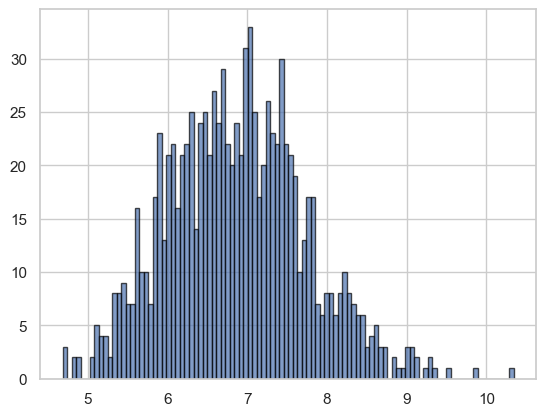

In [128]:
plt.hist(Etotal, bins=100, edgecolor='black', alpha=0.7)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  2.,  1.,  0.,  2.,  3.,  3.,  1.,  1.,
         2.,  0.,  3.,  3.,  5.,  4.,  3.,  6.,  6.,  7.,  8., 10.,  8.,
         6.,  8.,  8.,  6.,  7., 17., 17., 13., 10., 19., 21., 22., 30.,
        22., 23., 26., 20., 17., 25., 33., 31., 21., 24., 20., 22., 29.,
        24., 27., 21., 25., 24., 14., 25., 22., 21., 16., 22., 21., 13.,
        23., 17.,  7., 10., 10., 16.,  7.,  7.,  9.,  8.,  8.,  2.,  4.,
         4.,  5.,  2.,  0.,  0.,  2.,  2.,  0.,  3.]),
 array([-48.34375818, -47.53204919, -46.72034019, -45.9086312 ,
        -45.0969222 , -44.2852132 , -43.47350421, -42.66179521,
        -41.85008621, -41.03837722, -40.22666822, -39.41495923,
        -38.60325023, -37.79154123, -36.97983224, -36.16812324,
        -35.35641425, -34.54470525, -33.73299625, -32.92128726,
        -32.10957826, -31.29786927, -30.48616027, -29.67445127,
        -28.86274228, -28.05103328, -27.23932429, 

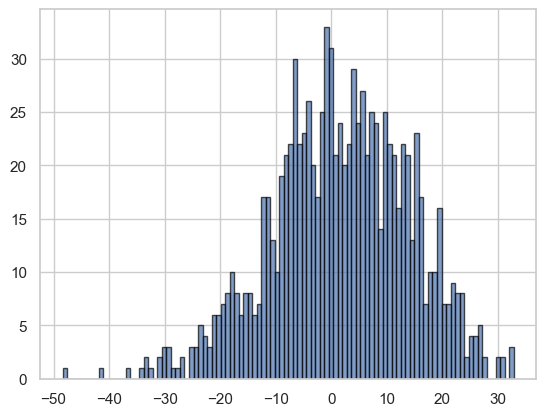

In [129]:
plt.hist(Epercent, bins=100, edgecolor='black', alpha=0.7)

#emissions reduction versus variables
#lolipoop: how much emisisons reduction/change by the change of each parameter (by lolipop/tornado plot)---go to prim

In [130]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_final)

df_scaled = pd.DataFrame(scaled_data, index=df_final.index, columns=df_final.columns)

In [131]:
df_scaled

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG
Row_Index,,,,,,,,,
0,1.677474,-1.279754,0.384994,0.583054,-1.295890,-1.170788,-1.554540,1.136918,0.875953
1,0.953497,-1.677824,-0.065707,-0.508896,-0.248662,0.525892,-0.763684,-0.887014,-0.378145
2,-0.212849,-0.609098,-1.211334,-1.251721,1.694467,0.173898,-0.856942,0.383467,-1.661694
3,0.960737,-1.366466,0.877889,1.213332,1.255221,-0.046938,-1.342524,-0.001103,0.633802
4,-1.685950,0.871515,-0.768344,0.117203,-0.782967,-1.545313,-0.369651,-1.255658,-1.303085
...,...,...,...,...,...,...,...,...,...
995,-1.352187,-0.520981,-0.228443,-1.064287,0.801757,-0.949135,-1.571367,0.730153,-0.581855
996,-1.579976,-1.038775,0.863112,1.605395,-0.048641,0.538271,-0.050584,0.822477,0.562439
997,-0.827963,-1.571590,0.730490,0.182437,0.938561,0.486198,1.584325,-0.128422,1.613089


In [132]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    return estimator.bic(X) 


param_grid = {
    "n_components": range(1, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}
grid_search = GridSearchCV(
    GaussianMixture(random_state=222), param_grid=param_grid, scoring=gmm_bic_score
)

grid_search.fit(df_scaled) #Z_tsne

df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df["mean_test_score"] = df["mean_test_score"]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "BIC score",
    }
)
df=df.sort_values(by="BIC score")#.head()
df_bic=df

In [133]:
def gmm_aic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the AIC score."""
    return estimator.aic(X)  # Use AIC instead of BIC

param_grid = {
    "n_components": range(1, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# Use the AIC scoring function
grid_search = GridSearchCV(
    GaussianMixture(random_state=222), param_grid=param_grid, scoring=gmm_aic_score
)

# Fit the model
grid_search.fit(df_scaled)  # Replace 'scores' with your dataset variable

# Extract the results into a DataFrame
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]

# Rename columns and process the DataFrame
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "AIC score",
    }
)

# Sort by AIC score
df=df.sort_values(by="AIC score")  # Add `.head()` to see the top results if needed
df_aic=df

In [134]:
# Define the parameter grid
param_grid = {
    "n_components": range(1, 10),
    "covariance_type": ["spherical", "tied", "diag", "full"],
}

# Create the GridSearchCV object without specifying scoring
grid_search = GridSearchCV(
    GaussianMixture(random_state=222),
    param_grid=param_grid,
    cv=5  # 3-fold cross-validation
)

# Fit the GridSearchCV object to the data
grid_search.fit(df_scaled)  # Ensure 'scores' is a valid dataset (array-like)

# Extract and format the results
df = pd.DataFrame(grid_search.cv_results_)[
    ["param_n_components", "param_covariance_type", "mean_test_score"]
]
df = df.rename(
    columns={
        "param_n_components": "Number of components",
        "param_covariance_type": "Type of covariance",
        "mean_test_score": "Mean Log-likelihood per sample",
    }
)

# Calculate the total log-likelihood if required
n_samples = df_scaled.shape[0]
df["Total Log-likelihood"] = df["Mean Log-likelihood per sample"] * n_samples

# Sort results by total log-likelihood (higher is better)
df = df.sort_values(by="Mean Log-likelihood per sample", ascending=False)

df_ll=df

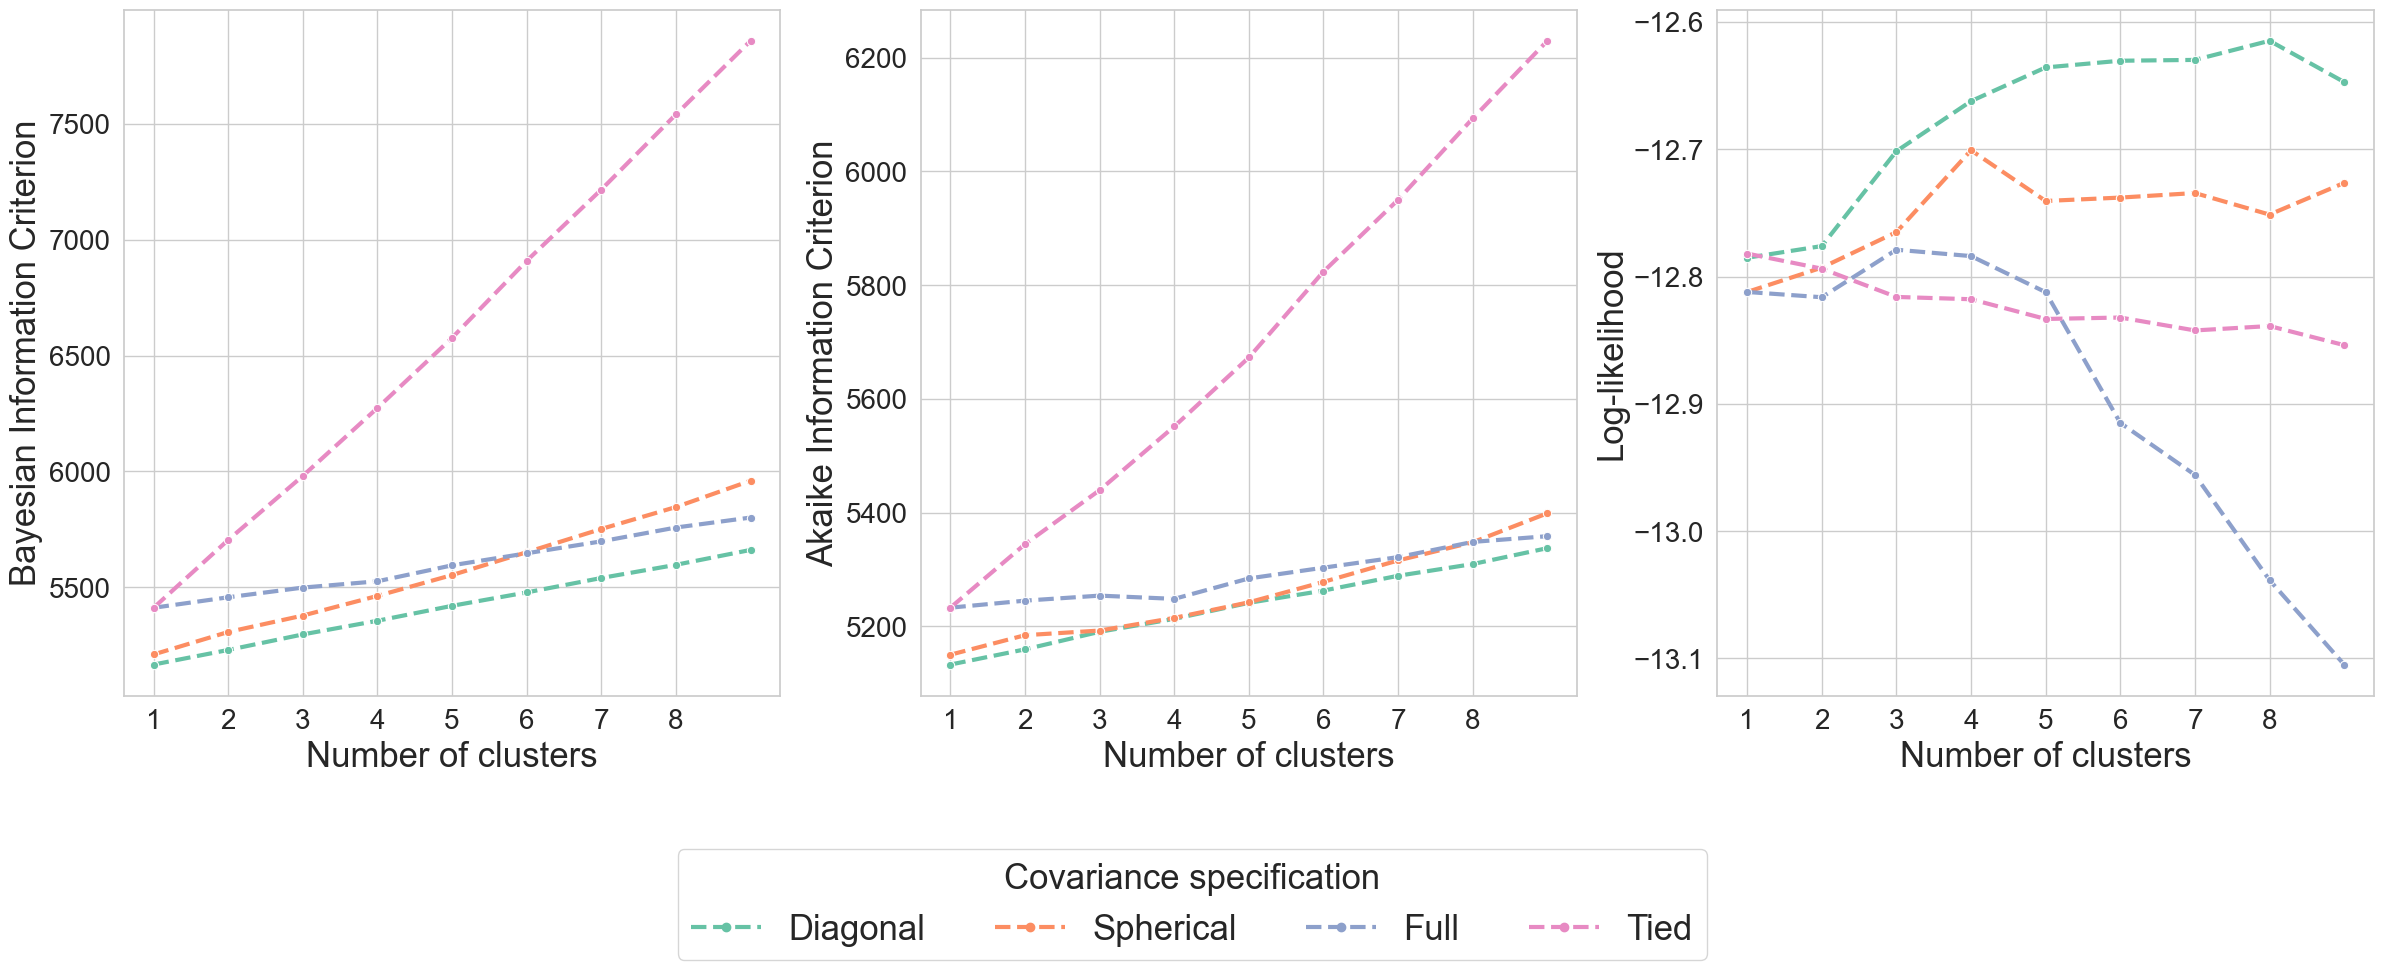

In [135]:
gmm_grid_bic = df_bic.copy()
gmm_grid_bic['Type of covariance'] = gmm_grid_bic['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})


gmm_grid_aic = df_aic.copy()
gmm_grid_aic['Type of covariance'] = gmm_grid_aic['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})



gmm_grid_ll = df_ll.copy()
gmm_grid_ll['Type of covariance'] = gmm_grid_ll['Type of covariance'].map({"spherical":"Spherical", "tied":"Tied", "diag":"Diagonal", "full":"Full"})



# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(24, 8))  # Adjusted figure size for 3 plots

# First plot: BIC score
sns.lineplot(data=gmm_grid_bic, x='Number of components', y='BIC score', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[0], legend=False)
axes[0].set_xlabel("Number of clusters", fontsize=25)
axes[0].set_ylabel("Bayesian Information Criterion", fontsize=25)
axes[0].tick_params(axis='both', labelsize=20)
axes[0].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# # Check if Number of components is 7 and Type of covariance is 'diag' for BIC plot
# bic_min_point = gmm_grid_bic[(gmm_grid_bic['Number of components'] == 7) & (gmm_grid_bic['Type of covariance'] == 'Diagonal')]
# if not bic_min_point.empty:
#     x = bic_min_point['Number of components'].values[0]
#     y = bic_min_point['BIC score'].values[0]
#     axes[0].annotate(' X', (x, y), fontsize=25, color='black', 
#                      verticalalignment='center', horizontalalignment='center', 
#                      textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Second plot: AIC score
sns.lineplot(data=gmm_grid_aic, x='Number of components', y='AIC score', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[1], legend=False)
axes[1].set_xlabel("Number of clusters", fontsize=25)
axes[1].set_ylabel("Akaike Information Criterion", fontsize=25)
axes[1].tick_params(axis='both', labelsize=20)
axes[1].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# # Check if Number of components is 7 and Type of covariance is 'diag' for AIC plot
# aic_min_point = gmm_grid_aic[(gmm_grid_aic['Number of components'] == 7) & (gmm_grid_aic['Type of covariance'] == 'Diagonal')]
# if not aic_min_point.empty:
#     x = aic_min_point['Number of components'].values[0]
#     y = aic_min_point['AIC score'].values[0]
#     axes[1].annotate(' X', (x, y), fontsize=25, color='black', 
#                      verticalalignment='center', horizontalalignment='center', 
#                      textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Third plot: Log-likelihood
sns.lineplot(data=gmm_grid_ll, x='Number of components', y='Mean Log-likelihood per sample', hue='Type of covariance',
             palette='Set2', marker='o', linewidth=3, linestyle='--', ax=axes[2], legend=False)
axes[2].set_xlabel("Number of clusters", fontsize=25)
axes[2].set_ylabel("Log-likelihood", fontsize=25)
axes[2].tick_params(axis='both', labelsize=20)
axes[2].set_xticks(range(1, 9))  # Set x-axis ticks from 1 to 10

# # Check if Number of components is 7 and Type of covariance is 'diag' for Log-likelihood plot
# ll_max_point = gmm_grid_ll[(gmm_grid_ll['Number of components'] == 7) & (gmm_grid_ll['Type of covariance'] == 'Diagonal')]
# if not ll_max_point.empty:
#     x = ll_max_point['Number of components'].values[0]
#     y = ll_max_point['Mean Log-likelihood per sample'].values[0]
#     axes[2].annotate(' X', (x, y), fontsize=25, color='black', 
#                      verticalalignment='center', horizontalalignment='center', 
#                      textcoords="offset points", xytext=(-4, 1))  # Adjusting position slightly

# Manually create the legend (using Line2D for markers)
# Define the handles (lines) and labels for the legend
handles = [
    Line2D([0], [0], color=sns.color_palette('Set2')[0], lw=3, linestyle='--', marker='o'),  # Type 1
    Line2D([0], [0], color=sns.color_palette('Set2')[1], lw=3, linestyle='--', marker='o'),  # Type 2
    Line2D([0], [0], color=sns.color_palette('Set2')[2], lw=3, linestyle='--', marker='o'),  # Type 3
    Line2D([0], [0], color=sns.color_palette('Set2')[3], lw=3, linestyle='--', marker='o')   # Type 4
]
labels = ['Diagonal', 'Spherical', 'Full', 'Tied']  # Modify according to your actual labels for the types

# Add the legend to the figure at the bottom
fig.legend(handles, labels, title='Covariance specification', fontsize=25, title_fontsize=25, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Adjust layout to avoid overlap and ensure the legend is visible
plt.subplots_adjust(bottom=0.2)  # Adjust bottom spacing to make room for the legend
plt.tight_layout()

# Save the figure with the legend
#plt.savefig('../../figures/combined_plots_criterion.jpg', dpi=1200, bbox_inches='tight')
# plt.show()


#percentage change in each parameters without scaling
#random forest decision tree: activity changes


In [136]:
gmm = GaussianMixture(random_state=222, n_components=5,covariance_type="diag")
gmm.fit(df_final)

GaussianMixture(covariance_type='diag', n_components=5, random_state=222)

In [137]:

# Get the cluster labels from the GMM
df_final['Cluster_Label'] = gmm.predict(df_final)+1
df_final

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG,Cluster_Label
Row_Index,,,,,,,,,,
0,4.170675,2.440272,26.778508,635.381386,0.90192,1.1703,41.133444,13.255575,12514.310837,2
1,3.58343,1.995548,23.642806,463.962176,1.876586,2.984939,58.168773,7.424683,8898.212379,5
2,2.637362,3.189528,15.672224,347.350269,3.685077,2.608473,56.159946,11.084902,5197.191394,4
3,3.589302,2.343397,30.207778,734.325305,3.276266,2.372284,45.700332,9.976967,11816.087676,2
4,1.442473,4.843667,18.754282,562.250092,1.379303,0.769736,66.656378,6.36263,6231.213137,4
...,...,...,...,...,...,...,...,...,...,...
995,1.713201,3.287971,22.510583,376.774453,2.854222,1.407363,40.770966,12.083695,8310.829633,1
996,1.528433,2.709493,30.104965,795.873123,2.062748,2.998179,73.529216,12.349679,11610.317507,2
997,2.13842,2.114233,29.182259,572.490731,2.981547,2.942485,108.74576,9.610166,14639.789659,3


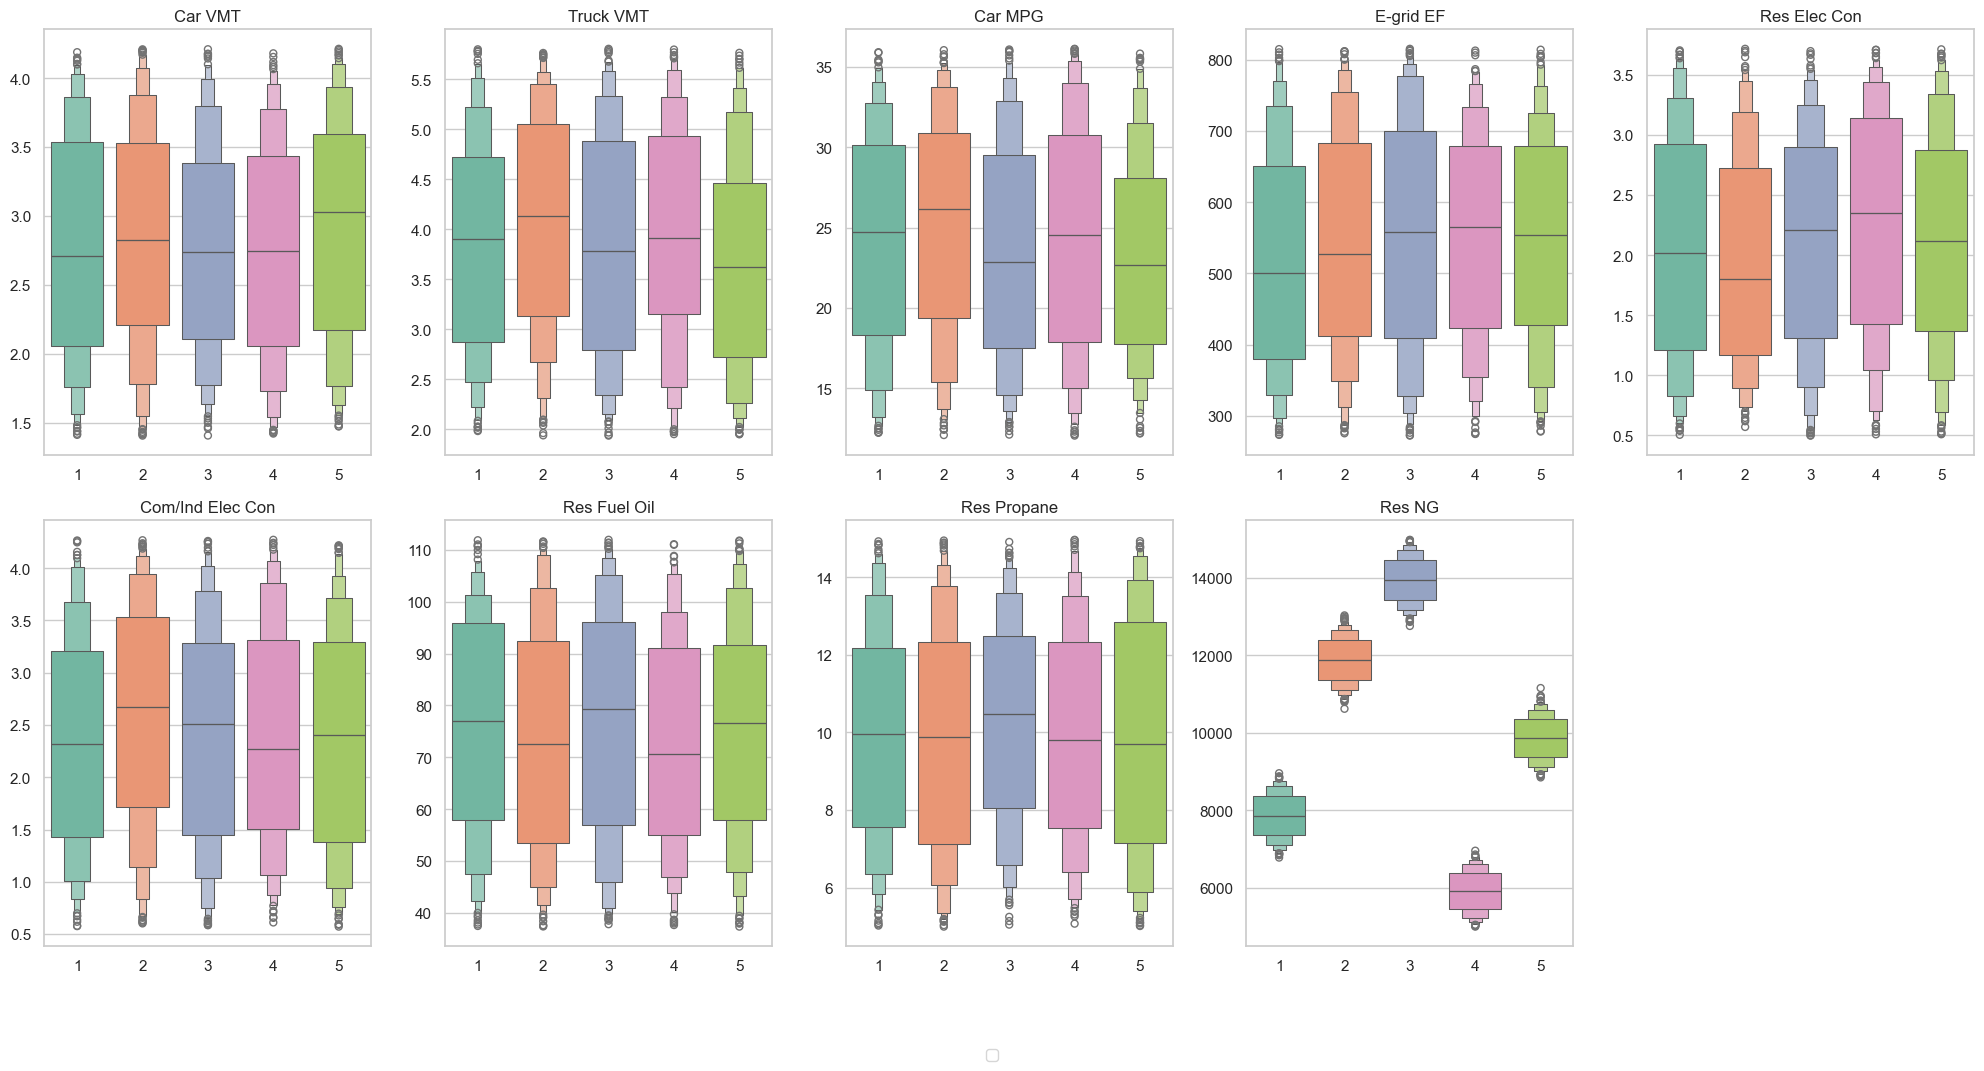

In [138]:
# Create a boxenplot for each parameter by Cluster_Label with different colors
parameters = ['Car VMT', 'Truck VMT', 'Car MPG', 'E-grid EF', 'Res Elec Con', 
              'Com/Ind Elec Con', 'Res Fuel Oil', 'Res Propane', 'Res NG']

# Set the style of the plot
sns.set(style="whitegrid")

# Create subplots with 2 rows and 5 columns for the first row, and 4 columns for the second row
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust size to fit the plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through parameters to create a boxenplot for each
for i, param in enumerate(parameters):
    sns.boxenplot(x='Cluster_Label', y=param, data=df_final, ax=axes[i], hue='Cluster_Label', 
                  palette='Set2', legend=False)  # Set legend=False to remove the legend from each plot
    axes[i].set_title(f'{param}')
    
    
    # Remove x-axis label and y-axis label
    axes[i].set_xlabel('')  # Remove x-axis title
    axes[i].set_ylabel('')  # Remove y-axis label

# Remove any empty subplots if necessary (this is for the case where there are more subplots than parameters)
for i in range(len(parameters), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and make space for the legend
plt.tight_layout()

# Create a single legend at the bottom of the entire plot
handles, labels = axes[0].get_legend_handles_labels()  # Get the handles and labels from the first subplot
fig.legend(handles, labels, loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.05))  # Place the legend at the bottom

plt.show()

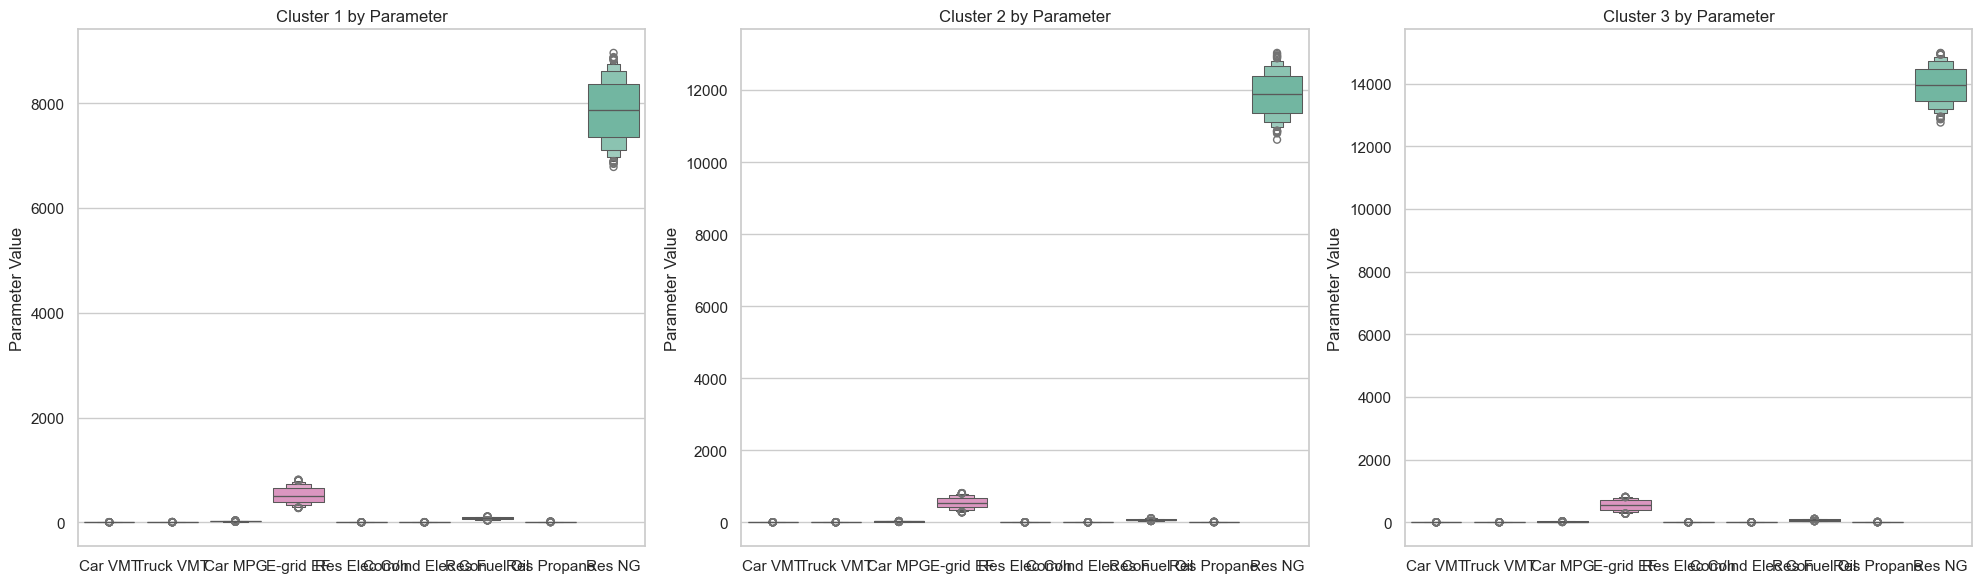

In [139]:
# Create a boxenplot for each cluster, showing the distribution of parameters for each cluster
parameters = ['Car VMT', 'Truck VMT', 'Car MPG', 'E-grid EF', 'Res Elec Con', 
              'Com/Ind Elec Con', 'Res Fuel Oil', 'Res Propane', 'Res NG']

# Set the style of the plot
sns.set(style="whitegrid")

# Create subplots for the three clusters (one for each)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))  # 3 subplots for 3 clusters

# Loop through clusters (1, 2, 3) and create a boxenplot for each
for i, cluster in enumerate([1, 2, 3]):
    # Filter data for the current cluster
    cluster_data = df_final[df_final['Cluster_Label'] == cluster]
    
    # Plot each parameter for the current cluster
    sns.boxenplot(data=cluster_data[parameters], ax=axes[i], palette='Set2')
    axes[i].set_title(f'Cluster {cluster} by Parameter')
    axes[i].set_ylabel('Parameter Value')  # Label for y-axis (parameter values)

# Adjust layout to make space for the plots
plt.tight_layout()

# Show the plot
plt.show()

In [140]:
df_final['Emissions (MMTCO2e)'] = Etotal
df_final['Emissions Percent Change (%)'] = Epercent

In [141]:
df_final

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG,Cluster_Label,Emissions (MMTCO2e),Emissions Percent Change (%)
Row_Index,,,,,,,,,,,,
0,4.170675,2.440272,26.778508,635.381386,0.90192,1.1703,41.133444,13.255575,12514.310837,2,5.748425,17.547837
1,3.58343,1.995548,23.642806,463.962176,1.876586,2.984939,58.168773,7.424683,8898.212379,5,5.875042,15.731703
2,2.637362,3.189528,15.672224,347.350269,3.685077,2.608473,56.159946,11.084902,5197.191394,4,6.340683,9.052822
3,3.589302,2.343397,30.207778,734.325305,3.276266,2.372284,45.700332,9.976967,11816.087676,2,6.653127,4.571301
4,1.442473,4.843667,18.754282,562.250092,1.379303,0.769736,66.656378,6.36263,6231.213137,4,5.994868,14.012990
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.713201,3.287971,22.510583,376.774453,2.854222,1.407363,40.770966,12.083695,8310.829633,1,5.331764,23.524185
996,1.528433,2.709493,30.104965,795.873123,2.062748,2.998179,73.529216,12.349679,11610.317507,2,6.455417,7.407131
997,2.13842,2.114233,29.182259,572.490731,2.981547,2.942485,108.74576,9.610166,14639.789659,3,6.597408,5.370503


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14428\520642056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_Label", y="Emissions (MMTCO2e)", data=df_final, palette="Set2")


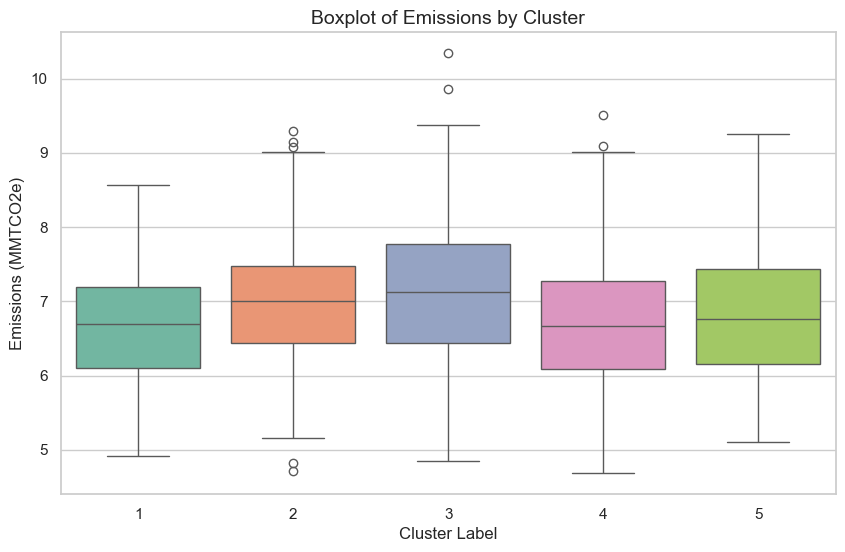

In [142]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x="Cluster_Label", y="Emissions (MMTCO2e)", data=df_final, palette="Set2")

# Add title and labels
plt.title("Boxplot of Emissions by Cluster", fontsize=14)
plt.xlabel("Cluster Label", fontsize=12)
plt.ylabel("Emissions (MMTCO2e)", fontsize=12)

# Show the plot
plt.show()

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_14428\3955078548.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster_Label", y="Emissions Percent Change (%)", data=df_final, palette="Set2")


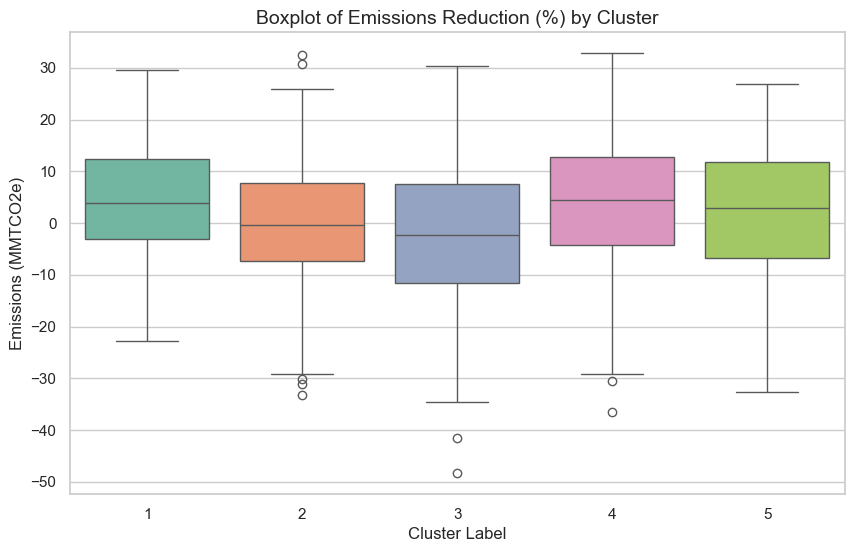

In [143]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a boxplot
sns.boxplot(x="Cluster_Label", y="Emissions Percent Change (%)", data=df_final, palette="Set2")

# Add title and labels
plt.title("Boxplot of Emissions Reduction (%) by Cluster", fontsize=14)
plt.xlabel("Cluster Label", fontsize=12)
plt.ylabel("Emissions Change (%)", fontsize=12)

# Show the plot
plt.show()

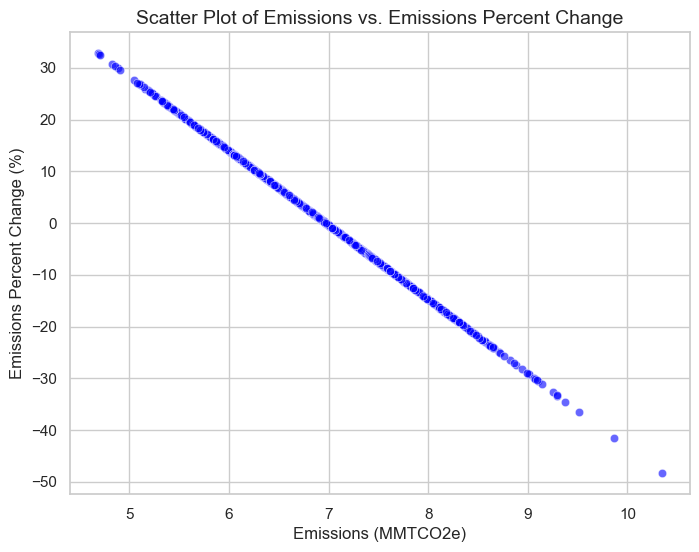

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(8, 6))

# Create scatter plot
sns.scatterplot(x="Emissions (MMTCO2e)", y="Emissions Percent Change (%)", data=df_final, color="blue", alpha=0.6)

# Add title and labels
plt.title("Scatter Plot of Emissions vs. Emissions Percent Change", fontsize=14)
plt.xlabel("Emissions (MMTCO2e)", fontsize=12)
plt.ylabel("Emissions Percent Change (%)", fontsize=12)

# Show the plot
plt.show()


In [145]:
df_final

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG,Cluster_Label,Emissions (MMTCO2e),Emissions Percent Change (%)
Row_Index,,,,,,,,,,,,
0,4.170675,2.440272,26.778508,635.381386,0.90192,1.1703,41.133444,13.255575,12514.310837,2,5.748425,17.547837
1,3.58343,1.995548,23.642806,463.962176,1.876586,2.984939,58.168773,7.424683,8898.212379,5,5.875042,15.731703
2,2.637362,3.189528,15.672224,347.350269,3.685077,2.608473,56.159946,11.084902,5197.191394,4,6.340683,9.052822
3,3.589302,2.343397,30.207778,734.325305,3.276266,2.372284,45.700332,9.976967,11816.087676,2,6.653127,4.571301
4,1.442473,4.843667,18.754282,562.250092,1.379303,0.769736,66.656378,6.36263,6231.213137,4,5.994868,14.012990
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.713201,3.287971,22.510583,376.774453,2.854222,1.407363,40.770966,12.083695,8310.829633,1,5.331764,23.524185
996,1.528433,2.709493,30.104965,795.873123,2.062748,2.998179,73.529216,12.349679,11610.317507,2,6.455417,7.407131
997,2.13842,2.114233,29.182259,572.490731,2.981547,2.942485,108.74576,9.610166,14639.789659,3,6.597408,5.370503


In [146]:
# Dropping multiple columns
df_final = df_final.drop(columns=['Emissions Percent Change (%)'])

df_final

#100000
#emisisons per ccange 

,Car VMT,Truck VMT,Car MPG,E-grid EF,Res Elec Con,Com/Ind Elec Con,Res Fuel Oil,Res Propane,Res NG,Cluster_Label,Emissions (MMTCO2e)
Row_Index,,,,,,,,,,,
0,4.170675,2.440272,26.778508,635.381386,0.90192,1.1703,41.133444,13.255575,12514.310837,2,5.748425
1,3.58343,1.995548,23.642806,463.962176,1.876586,2.984939,58.168773,7.424683,8898.212379,5,5.875042
2,2.637362,3.189528,15.672224,347.350269,3.685077,2.608473,56.159946,11.084902,5197.191394,4,6.340683
3,3.589302,2.343397,30.207778,734.325305,3.276266,2.372284,45.700332,9.976967,11816.087676,2,6.653127
4,1.442473,4.843667,18.754282,562.250092,1.379303,0.769736,66.656378,6.36263,6231.213137,4,5.994868
...,...,...,...,...,...,...,...,...,...,...,...
995,1.713201,3.287971,22.510583,376.774453,2.854222,1.407363,40.770966,12.083695,8310.829633,1,5.331764
996,1.528433,2.709493,30.104965,795.873123,2.062748,2.998179,73.529216,12.349679,11610.317507,2,6.455417
997,2.13842,2.114233,29.182259,572.490731,2.981547,2.942485,108.74576,9.610166,14639.789659,3,6.597408


In [151]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from prim import Prim  # Correct import statement
import matplotlib.pyplot as plt

#make output the emisisons change: raw activity, scaled activity, percentage change of the activity from baseline

# Step 1: Normalize the data (PRIM works better with normalized data)
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_final.drop(columns=['Cluster_Label', 'Emissions (MMTCO2e)']))
normalized_data = pd.DataFrame(normalized_data, columns=df_final.drop(columns=['Cluster_Label', 'Emissions (MMTCO2e)']).columns)

# Step 2: Define the target variable
# For PRIM, we need a binary target. Let's define a threshold for "low emissions."
#threshold = 6.0  # Example threshold (adjust based on your data) #-0.5
#df_final['Target'] = (df_final['Emissions (MMTCO2e)'] < threshold).astype(int)

# Step 3: Apply PRIM
# Define features (parameters) and target
X = df_final  # Use normalized parameter values
y = df_final['Emissions (MMTCO2e)']  # Binary target variable

# Initialize PRIM
prim = Prim(X, y, threshold=-0.5, peel_alpha=0.1, threshold_type="<")  # Adjust threshold and peel_alpha as needed

# Find the first box
box = prim.find_box()

# Inspect the box
print("PRIM Box:")
print(box)

# Step 4: Visualize the PRIM box
# Show the trade-off between coverage and density
box.show_tradeoff()
plt.show()

# Step 5: Assign rows to clusters based on PRIM boxes
# Create a new column to store PRIM cluster labels
df_final['PRIM_Cluster'] = 'Default'  # Default cluster for rows not in any box

# Assign rows to PRIM clusters
for i, box in enumerate(prim.boxes):
    df_final.loc[box.contains(X), 'PRIM_Cluster'] = f'PRIM_Cluster_{i+1}'

# Step 6: Analyze PRIM clusters
# Group by PRIM clusters and calculate mean values of parameters and emissions
prim_cluster_summary = df_final.groupby('PRIM_Cluster').mean()
print("PRIM Cluster Summary:")
print(prim_cluster_summary)

# Step 7: Visualize PRIM clusters
# Plot the distribution of emissions across PRIM clusters
plt.figure(figsize=(10, 6))
plt.bar(prim_cluster_summary.index, prim_cluster_summary['Emissions (MMTCO2e)'], color='skyblue')
plt.xlabel('PRIM Cluster')
plt.ylabel('Average Emissions (MMTCO2e)')
plt.title('Average Emissions by PRIM Cluster')
plt.show()

# Step 8: Compare PRIM clusters with original clusters
# Group by both PRIM clusters and original clusters
comparison_summary = df_final.groupby(['PRIM_Cluster', 'Cluster_Label']).size().unstack(fill_value=0)
print("Comparison of PRIM Clusters and Original Clusters:")
print(comparison_summary)

# Step 9: Save the results (optional)
# Save the updated dataframe with PRIM cluster labels to a new CSV file
#df_final.to_csv('df_final_with_PRIM_clusters.csv', index=False)

ValueError: could not convert string to float: 'Default'

In [150]:
normalized_data['Emissions (MMTCO2e)']

KeyError: 'Emissions (MMTCO2e)'